In [1]:
import random
random.seed(2345)


In [2]:
import xlwt
import numpy as np
import random
from from_model import *
import xlwt
import pickle5 as pickle
word = pickle.load(open("TSCL_500data_2DayRep.pkl", 'rb'),
                   encoding='utf-8')
word = word['CLOSE'].to_numpy()
true_label = list()
threshold, threshold2 = 0.0006, 0.0003
window_size = 10
total_len = 10000
data = word[:total_len]
for i in range(len(data) - 100):
    total = sum(data[i:i+window_size])/window_size
    ratio = float(data[i]) / float(total) - 1
    if ratio > threshold: temp = 2
    elif ratio <= threshold and ratio > threshold2: temp = 1
    elif ratio <= threshold2 and ratio > -threshold2: temp = 0
    elif ratio <= -threshold2 and ratio > -threshold: temp = -1
    elif ratio <= -threshold: temp = -2
    true_label.append(temp)

workbook = xlwt.Workbook(encoding= 'ascii')
worksheet = workbook.add_sheet("My new Sheet")
worksheet.write(0, 0, "close价格")
worksheet.write(0, 1, "价格差距")
worksheet.write(0, 2, "真实标签")
worksheet.write(0, 3, "预测标签")
worksheet.write(0, 4, "原仓位")
worksheet.write(0, 5, "预测仓位")
worksheet.write(0, 6, "成本")
worksheet.write(0, 7, "S值")
worksheet.write(0, 8, "盈利")

In [3]:
otherdat = model_pred3(true_label)

In [4]:
acc_list = list()
for i in range(len(otherdat)):
    if otherdat[i] == true_label[i]:
        acc_list.append(i)
s_value = list()
for i in range(1, len(true_label)):
    worksheet.write(i, 0, data[i])
    worksheet.write(i, 1, data[i+1]-data[i])
    worksheet.write(i, 2, true_label[i])
    worksheet.write(i, 3, otherdat[i])
    worksheet.write(i, 4, float(true_label[i])/2)
    worksheet.write(i, 5, float(otherdat[i])/2)
    worksheet.write(i, 6, float(data[i+1]-data[i])*0.0002)
    s = float(data[i+1]-data[i])/float(data[i])*otherdat[i]
    worksheet.write(i, 7, s)
    worksheet.write(i, 8, s - float(data[i+1]-data[i])*0.0002)
    s_value.append(s)

In [5]:
avg_s = np.absolute(sum(s_value) / len(s_value))
std_s = np.std(s_value)
sharp_value = (avg_s / std_s) * np.sqrt(240)



In [6]:
print("#" * 100)
print("Original Accuracy: {:5.4f}".format(len(acc_list)/total_len))
print("mean_s: {:5.4f} std_s: {:5.4f} "
      "result_s: {:5.4f}".format(avg_s, std_s, sharp_value))

####################################################################################################
Original Accuracy: 0.6051
mean_s: 0.0007 std_s: 0.0033 result_s: 3.0459


In [7]:
workbook.save("result/dynamic_model.xls")
print("hello world")

hello world


In [8]:
import matplotlib.pyplot as plt

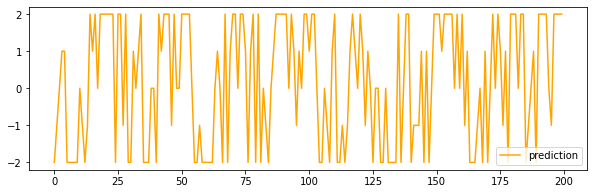

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
# plt.plot(true_label[:200], label="true")
plt.plot(otherdat[:200], label="prediction", color="orange")
plt.legend()
# hyperparameters selection
# sharp ratio